### Compare Keldysh correlators against MuNRG

In [1]:
using TCI4Keldysh
using PythonPlot
using PythonCall
using MAT
using LinearAlgebra

INCH_TO_PT = 72
PT_TO_INCH = 1.0/INCH_TO_PT
COLUMN_PT = 432
COLUMN_INCH = COLUMN_PT*PT_TO_INCH
PLOT_COLUMN_PT = 420
PLOT_COLUMN_INCH = PLOT_COLUMN_PT*PT_TO_INCH
PLOT_PAGE_PT = PLOT_COLUMN_PT*2
PLOT_PAGE_INCH = PLOT_PAGE_PT*PT_TO_INCH


# setup
channel = "t"
base_path = "SIAM_u=0.50"
PSFpath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
Vpath = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50", "V_KF_" * TCI4Keldysh.channel_translate(channel))
flavor = 1

┌ Warning: Replacing docs for `TCI4Keldysh.TuckerDecomposition :: Union{Tuple{Int64, Int64, Int64}, Tuple{T}} where T` in module `TCI4Keldysh`
└ @ Base.Docs docs/Docs.jl:243


size of Σ_vec:(200,)
size of Σ_slanted: (101, 100)
size of Σ_vec:(200,)
size of Σ_slanted: (101, 100)


1

#### 3-point correlators

In [2]:
using HDF5
tppath = joinpath(TCI4Keldysh.datadir(), base_path, "CF_KF/CF_KF_((Q12,Q3,F3dag))_Hw=0.4_Lw=0.001_0.0005_0.0005.h5")
ogrid = h5read(tppath, "ogrid");
Gref = h5read(tppath, "Ggridreal") + im * h5read(tppath, "Ggridimag");
size(Gref)

(401, 401, 2, 2, 2)

In [49]:
gamvec = [0.001, 0.0005, 0.0005]
sigmak = [0.4]
# ommat3p = TCI4Keldysh.channel_trafo_K2("t", false)
# ommat3p = TCI4Keldysh.channel_trafo("t")[1:3,1:2]
# display(TCI4Keldysh.channel_trafo("t"))
# display(ommat3p)
# from Matlab script
# ommat = [1 0 0; -1  0 -1;  0  1  1;  0 -1  0];

# ommat3p = [1 0; -1 -1; 0 1]
ommat3p = [1 1; -1 0; 0 -1]
display(ommat3p)
G = TCI4Keldysh.FullCorrelator_KF(
        PSFpath, ["Q12", "Q3", "F3dag"];
        T=TCI4Keldysh.dir_to_T(PSFpath),
        flavor_idx=flavor, ωs_ext=(vec(ogrid),vec(ogrid)), ωconvMat=ommat3p, sigmak=sigmak, γ=gamvec, estep=50, emin=1.e-6, emax=1.e4
        )
GJ = TCI4Keldysh.precompute_all_values(G);

3×2 Matrix{Int64}:
  1   1
 -1   0
  0  -1

Loading stuff:   0.006994 seconds (1.20 k allocations: 965.695 KiB)
Creating Broadened PSFs:   2.091451 seconds (4.06 M allocations: 6.741 GiB, 20.93% gc time)
All the rest:   0.298127 seconds (57.59 k allocations: 969.416 MiB, 5.38% gc time)


Plot 2D

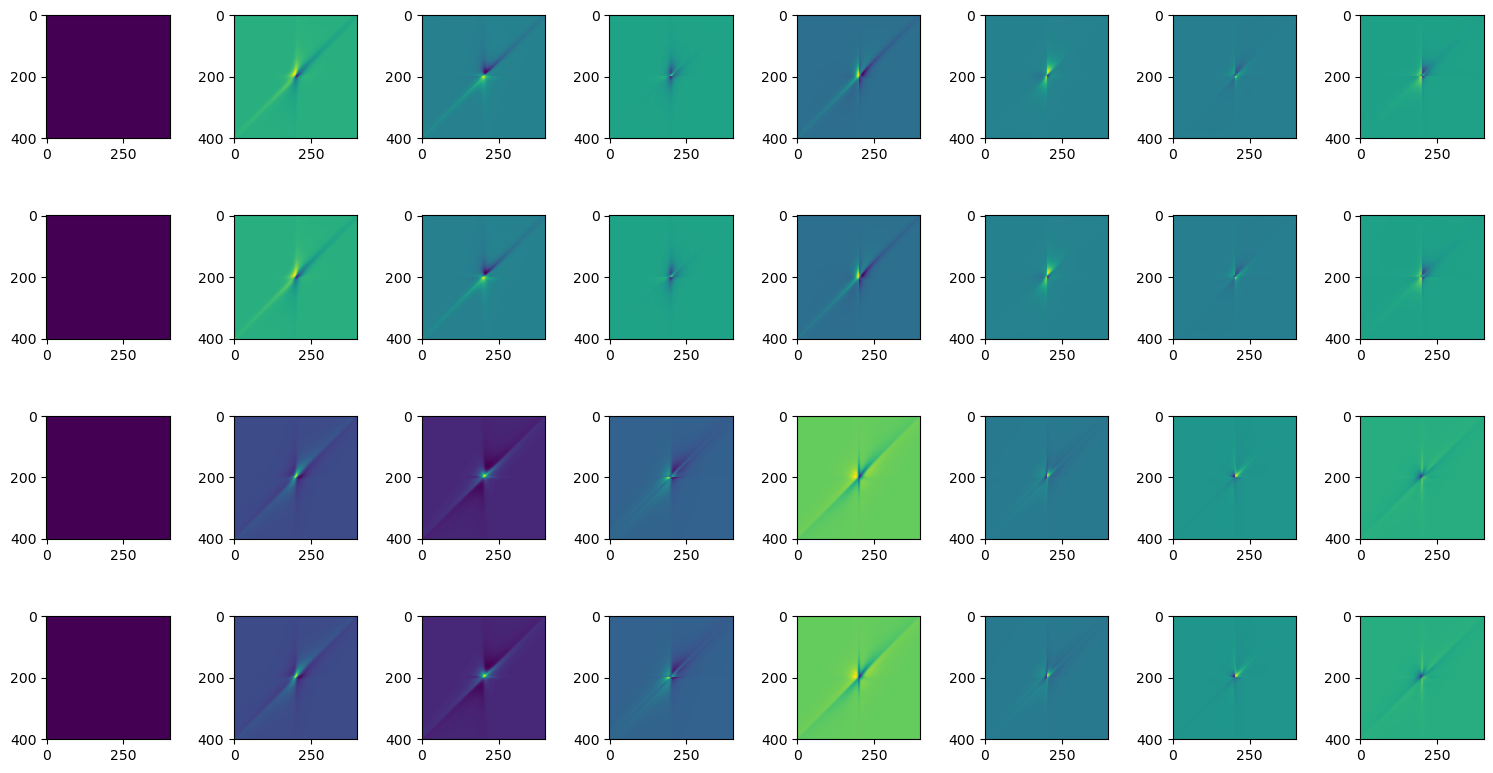

In [50]:
fig, axs = subplots(4,8, figsize=(1.3 * PLOT_PAGE_INCH, 0.7*PLOT_PAGE_INCH))

cc = 0

for ik in Iterators.product(ntuple(_->1:2,3)...)
    axs[0,cc].imshow(real.(Gref[:,:,ik...]))
    axs[1,cc].imshow(real.(GJ[:,:,ik...]))
    axs[2,cc].imshow(imag.(Gref[:,:,ik...]))
    axs[3,cc].imshow(imag.(GJ[:,:,ik...]))
    cc += 1
end

fig.tight_layout()
display(fig)

Plot cuts

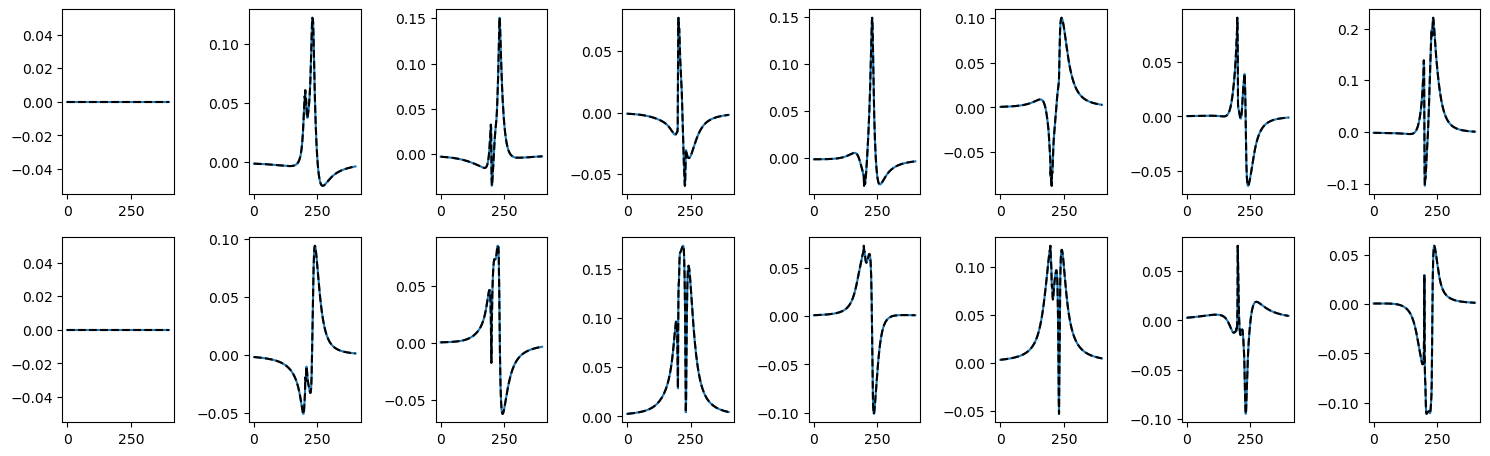

In [56]:
fig, axs = subplots(2,8, figsize=(1.3 * PLOT_PAGE_INCH, 0.4*PLOT_PAGE_INCH))

cc = 0

slice_idx = 170
for ik in Iterators.product(ntuple(_->1:2,3)...)
    axs[0,cc].plot(real.(Gref[:,slice_idx,ik...]))
    axs[0,cc].plot(real.(GJ[:,slice_idx,ik...]); linestyle="--", color="black")
    axs[1,cc].plot(imag.(Gref[:,slice_idx,ik...]))
    axs[1,cc].plot(imag.(GJ[:,slice_idx,ik...]); linestyle="--", color="black")
    cc += 1
end

fig.tight_layout()
display(fig)

Difference

In [59]:
diff = Gref .- GJ;
for ik in Iterators.product(ntuple(_->1:2,3)...)
    println("-- ik=$ik")
    err =  maximum(abs.(diff[:,:,ik...]))
    scale_err = maximum(abs.(diff[:,:,ik...])) ./ maximum(abs.(Gref[:,:,ik...]))
    @show err
    @show scale_err
end

-- ik=(1, 1, 1)
err = 0.0
scale_err = NaN
-- ik=(2, 1, 1)
err = 0.0006700811850129104
scale_err = 0.0008015622645074397
-- ik=(1, 2, 1)
err = 0.0006860545605256469
scale_err = 0.0008584571228592591
-- ik=(2, 2, 1)
err = 0.0010374554766294222
scale_err = 0.0009554052853950643
-- ik=(1, 1, 2)
err = 0.0005301195620773336
scale_err = 0.0006650366226732559
-- ik=(2, 1, 2)
err = 0.001193425606621349
scale_err = 0.000756292625233574
-- ik=(1, 2, 2)
err = 0.0008139265336092038
scale_err = 0.0004357994092422961
-- ik=(2, 2, 2)
err = 0.001764755287733052
scale_err = 0.0008398699436233535
